In [ ]:
import os
import cv2 
import numpy as np
from PIL import Image
from imutils import paths
import imageio
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.segmentation import watershed
from skimage.segmentation import random_walker
from skimage.feature import peak_local_max
from scipy import ndimage
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# !pip install opencv-python==3.4.2.16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train=np.load('/content/drive/MyDrive/masksNumpy/x_train.npy')
x_test=np.load('/content/drive/MyDrive/masksNumpy/x_test.npy')
y_test=np.load('/content/drive/MyDrive/masksNumpy/y_test.npy')
y_train=np.load('/content/drive/MyDrive/masksNumpy/y_train.npy')

In [ ]:
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [ ]:
x_train=np.load('/content/drive/MyDrive/masksNumpy/sift_features_x_train.npy')
x_test=np.load('/content/drive/MyDrive/masksNumpy/sift_features_x_test.npy')
y_test=np.load('/content/drive/MyDrive/masksNumpy/sift_features_y_test.npy')
y_train=np.load('/content/drive/MyDrive/masksNumpy/sift_features_y_train.npy')

In [ ]:
len(x_train)+len(x_test)

2595

In [ ]:
len(y_train)+len(y_test)

2595

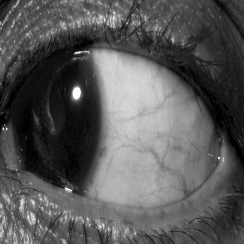

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(x_test[10])

In [ ]:
# HOG Feature Extraction

In [ ]:
# For X train

In [ ]:
hog_features_x_train.clear()
hog_x_train_images.clear()

In [ ]:
from skimage import feature as ft

hog_x_train_images=[]
hog_features_x_train=[]
for i in range(len(train_x)):
    bins=8
    cell_size=(24,24)
    cpb=(6,6)
    norm='L2'
    H,hogImage=ft.hog(train_x[i],orientations=bins,pixels_per_cell=cell_size,
                   cells_per_block=cpb,block_norm=norm,transform_sqrt=True,visualize=True)
    hog_x_train_images.append(hogImage)
    hog_features_x_train.append(H)

In [ ]:
X_train=np.array(hog_features_x_train)

In [ ]:
# For X_test

In [ ]:
# hog_features_x_test.clear()
# hog_x_test_images.clear()

In [ ]:
hog_x_test_images=[]
hog_features_x_test=[]
for i in range(len(test_x)):
    bins=8
    cell_size=(24,24)
    cpb=(6,6)
    norm='L2'
    H,hogImage=ft.hog(test_x[i],orientations=bins,pixels_per_cell=cell_size,
                   cells_per_block=cpb,block_norm=norm,transform_sqrt=True,visualize=True)
    hog_x_test_images.append(hogImage)
    hog_features_x_test.append(H)

In [ ]:
X_test=np.array(hog_features_x_test)

In [ ]:
# Preparing Training and testing image features

In [ ]:
len(x_train)

1949

In [ ]:
indices=np.arange(len(x_train))
# print(indices)
np.random.shuffle(indices)
print(indices)

[ 645   75 1422 ... 1148 1420  912]


In [ ]:
train_x=x_train[indices]
train_y=y_train[indices]

In [ ]:
indices=np.arange(len(x_test))
# print(indices)
np.random.shuffle(indices)
# print(indices)

In [ ]:
test_x=x_test[indices]
test_y=y_test[indices]

In [ ]:
len(X_train), type(X_train)

(1949, numpy.ndarray)

In [ ]:
len(X_test), type(X_test)

(646, numpy.ndarray)

In [ ]:
len(train_y), type(train_y)

(1949, numpy.ndarray)

In [ ]:
len(train_x)+len(test_x)

2595

In [ ]:
# SVM
# use X_train, X_test, test_y, train_y

In [ ]:
train_y

array([[ 36],
       [ 33],
       [133],
       ...,
       [ 81],
       [ 72],
       [ 68]])

In [ ]:
train_y.ravel()

array([  9, 130, 141, ..., 113,  23,  44])

In [ ]:
clf = svm.SVC()
clf.fit(X_train,train_y.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print('Accuracy: '+str(accuracy_score(test_y,y_pred)))
print('\n')
print(classification_report(test_y,y_pred))

Accuracy: 0.5294117647058824


              precision    recall  f1-score   support

           1       0.38      0.75      0.50         4
           2       1.00      0.50      0.67         2
           3       0.50      0.25      0.33         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.27      1.00      0.42         4
           7       0.50      0.25      0.33         4
           8       1.00      0.25      0.40         4
           9       0.33      0.75      0.46         4
          10       1.00      0.25      0.40         4
          11       1.00      0.50      0.67         4
          12       0.60      1.00      0.75         3
          13       0.80      1.00      0.89         4
          14       0.60      0.75      0.67         4
          15       1.00      0.75      0.86         4
          16       1.00      0.50      0.67         4
          17       0.50      1.00      0.67       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svc=svm.SVC(kernel='sigmoid',C=1)
svc.fit(X_train,train_y.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=svc.predict(X_test)

In [ ]:
print('Accuracy: '+str(accuracy_score(test_y,y_pred)))
print('\n')
print(classification_report(test_y,y_pred))

Accuracy: 0.14241486068111456


              precision    recall  f1-score   support

           1       0.33      0.25      0.29         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4
           5       0.08      0.25      0.12         4
           6       0.30      0.75      0.43         4
           7       0.00      0.00      0.00         4
           8       1.00      0.25      0.40         4
           9       0.20      0.25      0.22         4
          10       0.50      0.25      0.33         4
          11       0.50      1.00      0.67         4
          12       0.22      0.67      0.33         3
          13       0.50      0.25      0.33         4
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svc=svm.SVC(kernel='rbf',C=1)
svc.fit(X_train,train_y.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=svc.predict(X_test)

In [ ]:
print('Accuracy: '+str(accuracy_score(test_y,y_pred)))
print('\n')
print(classification_report(test_y,y_pred))

Accuracy: 0.5294117647058824


              precision    recall  f1-score   support

           1       0.38      0.75      0.50         4
           2       1.00      0.50      0.67         2
           3       0.50      0.25      0.33         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.27      1.00      0.42         4
           7       0.50      0.25      0.33         4
           8       1.00      0.25      0.40         4
           9       0.33      0.75      0.46         4
          10       1.00      0.25      0.40         4
          11       1.00      0.50      0.67         4
          12       0.60      1.00      0.75         3
          13       0.80      1.00      0.89         4
          14       0.60      0.75      0.67         4
          15       1.00      0.75      0.86         4
          16       1.00      0.50      0.67         4
          17       0.50      1.00      0.67       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svc=svm.SVC(kernel='poly',C=1)
svc.fit(X_train,train_y.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=svc.predict(X_test)

In [ ]:
print('Accuracy: '+str(accuracy_score(test_y,y_pred)))
print('\n')
print(classification_report(test_y,y_pred))

Accuracy: 0.7136222910216719


              precision    recall  f1-score   support

           1       0.60      0.75      0.67         4
           2       0.50      0.50      0.50         2
           3       0.67      0.50      0.57         4
           4       1.00      0.25      0.40         4
           5       0.25      0.25      0.25         4
           6       0.44      1.00      0.62         4
           7       0.67      0.50      0.57         4
           8       1.00      0.25      0.40         4
           9       0.60      0.75      0.67         4
          10       0.75      0.75      0.75         4
          11       1.00      0.50      0.67         4
          12       0.60      1.00      0.75         3
          13       1.00      1.00      1.00         4
          14       0.80      1.00      0.89         4
          15       1.00      0.75      0.86         4
          16       1.00      0.75      0.86         4
          17       0.60      1.00      0.75       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,train_y.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
print('Accuracy: '+str(accuracy_score(test_y,y_pred)))
print('\n')
print(classification_report(test_y,y_pred))

Accuracy: 0.3173374613003096


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.25      0.50      0.33         2
           3       1.00      0.25      0.40         4
           4       0.67      0.50      0.57         4
           5       0.18      0.50      0.27         4
           6       0.12      0.25      0.17         4
           7       0.14      0.25      0.18         4
           8       0.10      0.25      0.14         4
           9       0.17      0.50      0.25         4
          10       0.33      0.25      0.29         4
          11       0.33      0.25      0.29         4
          12       0.60      1.00      0.75         3
          13       0.50      0.25      0.33         4
          14       0.17      0.25      0.20         4
          15       1.00      0.75      0.86         4
          16       0.00      0.00      0.00         4
          17       0.08      0.33      0.13       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report=classification_report(test_y,y_pred, output_dict=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# macro_precision=report['macro avg']

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,train_y.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
print('Accuracy: '+str(accuracy_score(test_y,y_pred)))
print('\n')
print(classification_report(test_y,y_pred))

Accuracy: 0.25077399380804954


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.25      0.50      0.33         2
           3       1.00      0.25      0.40         4
           4       0.20      0.25      0.22         4
           5       0.14      0.50      0.22         4
           6       0.00      0.00      0.00         4
           7       0.20      0.25      0.22         4
           8       0.08      0.25      0.12         4
           9       0.25      0.25      0.25         4
          10       1.00      0.25      0.40         4
          11       0.17      0.25      0.20         4
          12       1.00      0.67      0.80         3
          13       0.20      0.25      0.22         4
          14       0.11      0.25      0.15         4
          15       1.00      0.25      0.40         4
          16       0.00      0.00      0.00         4
          17       0.08      0.33      0.12      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,train_y.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
print('Accuracy: '+str(accuracy_score(test_y,y_pred)))
print('\n')
print(classification_report(test_y,y_pred))

Accuracy: 0.413312693498452


              precision    recall  f1-score   support

           1       0.33      0.50      0.40         4
           2       0.33      0.50      0.40         2
           3       1.00      0.25      0.40         4
           4       1.00      1.00      1.00         4
           5       0.25      0.25      0.25         4
           6       0.33      1.00      0.50         4
           7       0.25      0.50      0.33         4
           8       0.09      0.25      0.13         4
           9       0.20      0.75      0.32         4
          10       0.33      0.50      0.40         4
          11       0.80      1.00      0.89         4
          12       1.00      0.67      0.80         3
          13       1.00      0.25      0.40         4
          14       0.33      0.25      0.29         4
          15       1.00      0.75      0.86         4
          16       0.40      0.50      0.44         4
          17       0.43      1.00      0.60        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train,train_y.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
print('Accuracy: '+str(accuracy_score(test_y,y_pred)))
print('\n')
print(classification_report(test_y,y_pred))

Accuracy: 0.628482972136223


              precision    recall  f1-score   support

           1       1.00      0.50      0.67         4
           2       0.33      0.50      0.40         2
           3       1.00      0.25      0.40         4
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         4
           6       0.50      1.00      0.67         4
           7       0.50      0.25      0.33         4
           8       0.20      0.25      0.22         4
           9       0.60      0.75      0.67         4
          10       1.00      0.75      0.86         4
          11       0.50      0.25      0.33         4
          12       0.50      1.00      0.67         3
          13       1.00      1.00      1.00         4
          14       1.00      0.75      0.86         4
          15       1.00      0.75      0.86         4
          16       0.67      0.50      0.57         4
          17       0.50      1.00      0.67        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
